In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1336 - accuracy: 0.9596 - val_loss: 0.0445 - val_accuracy: 0.9854
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0441 - accuracy: 0.9861 - val_loss: 0.0340 - val_accuracy: 0.9894
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0287 - accuracy: 0.9911 - val_loss: 0.0361 - val_accuracy: 0.9881
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0219 - accuracy: 0.9932 - val_loss: 0.0394 - val_accuracy: 0.9870
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0148 - accuracy: 0.9954 - val_loss: 0.0397 - val_accuracy: 0.9894


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 - 1s - loss: 0.0397 - accuracy: 0.9894 - 1s/epoch - 4ms/step
Test Accuracy: 0.9894


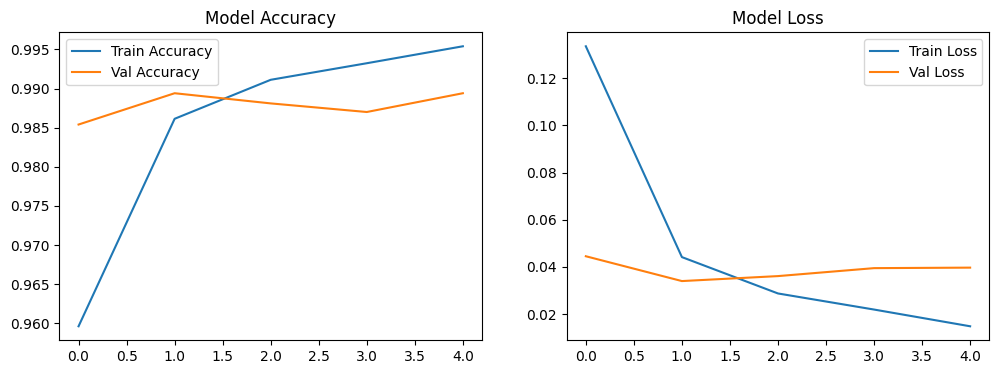

In [7]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

1/1 [==============================] - 0s 105ms/step


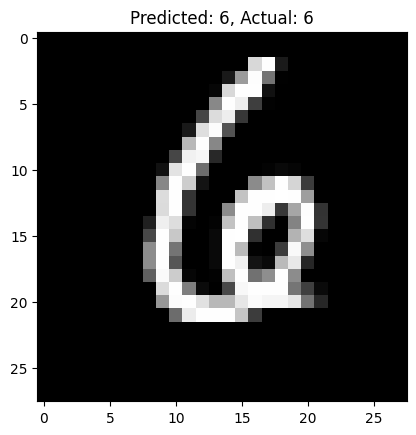

In [8]:
import numpy as np


sample_idx = 123
sample_image = x_test[sample_idx].reshape(1, 28, 28, 1)

prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction)

plt.imshow(x_test[sample_idx].reshape(28,28), cmap="gray")
plt.title(f"Predicted: {predicted_class}, Actual: {y_test[sample_idx]}")
plt.show()
